In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [27]:
recordCorrection = pd.DataFrame(columns=['Goal_Dist','Too_Close','Too_Far','Rec_Goal_Dist','Rec_Too_Close','Rec_Too_Far'])




In [28]:
goaldist = [83.75,51.667,61.25,71.25,51.25,58.75,56.67,52.92,74.17]
tooclose = [0,0,0,0,0,0,0,1.25,0]
toofar = [16.25,48.33,38.75,28.75,48.75,41.25,43.33,45.83,25.83]
recgoaldist = [93.90,57.91,67.48,83.14,64.33,67.70,66.22,59.28,84.88]
rectooclose = [0.45,1.55,2.00,0.00,0.00,0.00,0.00,6.00,0.00]
rectoofar = [5.64,40.53,30.95,16.40,35.44,32.07,33.56,34.68,14.67]


recordCorrection['Goal_Dist'] = goaldist
recordCorrection['Too_Close'] = tooclose
recordCorrection['Too_Far'] = toofar
recordCorrection['Rec_Goal_Dist'] = recgoaldist
recordCorrection['Rec_Too_Close'] = rectooclose
recordCorrection['Rec_Too_Far'] = rectoofar

In [29]:
recordCorrection['goaldist_diff'] = recordCorrection['Goal_Dist'] - recordCorrection['Rec_Goal_Dist']

In [30]:
recCorrectMean = recordCorrection['goaldist_diff'].mean() / 100
recCorrectMean

-0.09240333333333332

In [31]:
recCorrectSTD = recordCorrection['goaldist_diff'].std() / 100
recCorrectSTD

0.02531644919810043

In [111]:
goalPerfRec = pd.read_csv('parameter_tuning.csv')

In [112]:
goalPerfRec.head()

,delta_time,proportional_gain,integral_gain,derivative_gain,logistic_function_mid,logistic_function_growth_rate,lin_val_err_deriv_coeff,follower_too_far_percent,follower_too_close_percent,follower_goal_dist_percent
0,1.0,20,0.0,0.0,2,7.0,1.0,0.655172,0.017241,0.327586
1,1.0,20,0.0,0.0,2,7.0,1.0,0.741379,0.017241,0.241379
2,1.0,20,0.0,0.0,2,7.0,1.0,0.568966,0.068966,0.362069
3,1.0,20,0.0,0.0,2,7.0,1.0,0.672414,0.017241,0.310345
4,1.0,20,0.0,0.0,1,7.0,1.0,0.379310,0.155172,0.465517


In [113]:
goalPerfRec['corrected_goal_dist_percent'] = (goalPerfRec['follower_goal_dist_percent'] + (recCorrectMean + random.uniform(-recCorrectSTD, recCorrectSTD))) * 100

In [114]:
goalPerfRec['corrected_goal_dist_percent'].tail()

148    78.056757
149    56.504391
150    82.982370
151    74.799346
152    80.977836
Name: corrected_goal_dist_percent, dtype: float64

In [115]:
goalPerfRec.nunique()

delta_time                         4
proportional_gain                  8
integral_gain                      5
derivative_gain                    5
logistic_function_mid              3
logistic_function_growth_rate      6
lin_val_err_deriv_coeff            7
follower_too_far_percent         134
follower_too_close_percent        91
follower_goal_dist_percent       131
corrected_goal_dist_percent      131
dtype: int64

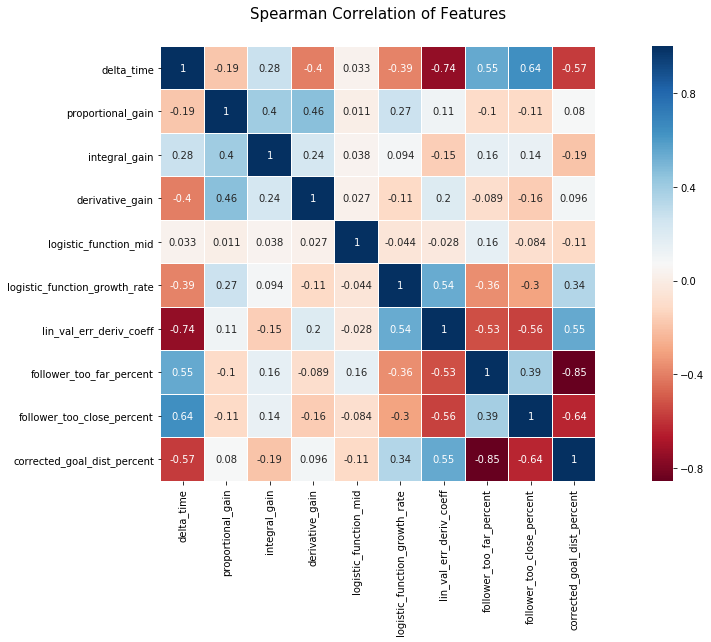

In [89]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,8))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(goalPerfRec.drop('follower_goal_dist_percent',axis=1).corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Text(0.5, 1.0, 'Goal Distance % vs. Proportional Gain ')

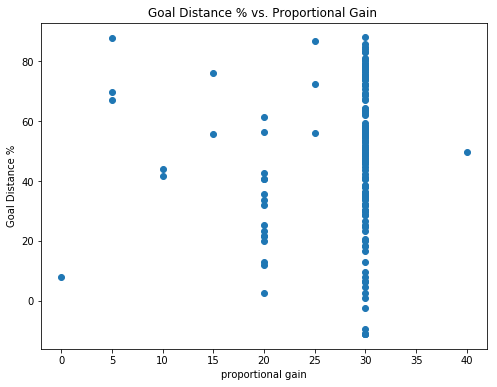

In [116]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(goalPerfRec['proportional_gain'], goalPerfRec['corrected_goal_dist_percent'])
ax.set_xlabel('proportional gain')
ax.set_ylabel('Goal Distance %')
ax.set_title('Goal Distance % vs. Proportional Gain ')

Text(0.5, 1.0, 'Goal Distance % vs. Integral Gain ')

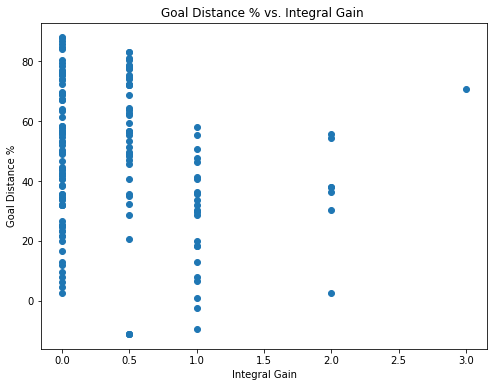

In [117]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(goalPerfRec['integral_gain'], goalPerfRec['corrected_goal_dist_percent'])
ax.set_xlabel('Integral Gain')
ax.set_ylabel('Goal Distance %')
ax.set_title('Goal Distance % vs. Integral Gain ')

Text(0.5, 1.0, 'Goal Distance % vs. logistic_function_growth_rate')

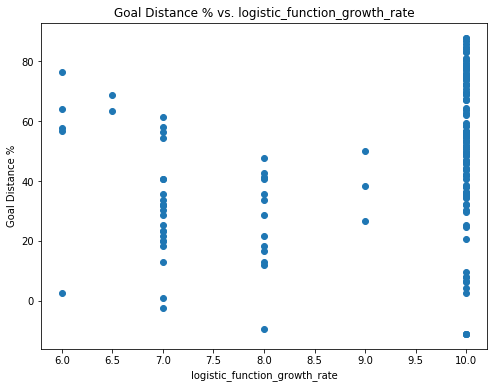

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(goalPerfRec['logistic_function_growth_rate'], goalPerfRec['corrected_goal_dist_percent'])
ax.set_xlabel('logistic_function_growth_rate')
ax.set_ylabel('Goal Distance %')
ax.set_title('Goal Distance % vs. logistic_function_growth_rate')

Text(0.5, 1.0, 'Goal Distance % vs. lin_val_err_deriv_coeff')

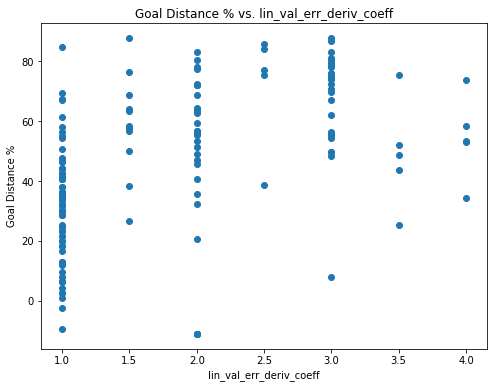

In [119]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(goalPerfRec['lin_val_err_deriv_coeff'], goalPerfRec['corrected_goal_dist_percent'])
ax.set_xlabel('lin_val_err_deriv_coeff')
ax.set_ylabel('Goal Distance %')
ax.set_title('Goal Distance % vs. lin_val_err_deriv_coeff')

Text(0.5, 1.0, 'Goal Distance % vs. delta_time')

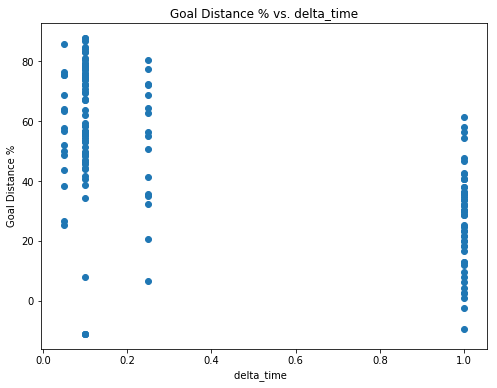

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(goalPerfRec['delta_time'], goalPerfRec['corrected_goal_dist_percent'])
ax.set_xlabel('delta_time  ')
ax.set_ylabel('Goal Distance %')
ax.set_title('Goal Distance % vs. delta_time')

In [121]:
# drop rows fewer than 10% goal distance, these were generally failures in testing
goalPerfRec = goalPerfRec[goalPerfRec['corrected_goal_dist_percent'] > 10]

In [122]:
goalPerfRec['corrected_goal_dist_percent'].describe()

count    138.000000
mean      52.028154
std       19.970724
min       12.063912
25%       35.538713
50%       53.091831
75%       69.691578
max       87.834916
Name: corrected_goal_dist_percent, dtype: float64

In [134]:
goalPerfRec['follower_too_far_percent'] = goalPerfRec['follower_too_far_percent'] * 100
goalPerfRec['follower_too_far_percent'].describe()

count    138.000000
mean      33.145981
std       17.452443
min        0.921659
25%       18.792902
50%       32.984665
75%       46.551724
max       74.358974
Name: follower_too_far_percent, dtype: float64

In [140]:
goalPerfRec['follower_too_close_percent'] = goalPerfRec['follower_too_close_percent'] * 100
goalPerfRec['follower_too_close_percent'].describe()

count    138.000000
mean      33.145981
std       17.452443
min        0.921659
25%       18.792902
50%       32.984665
75%       46.551724
max       74.358974
Name: follower_too_close_percent, dtype: float64

In [123]:
optimalSet = goalPerfRec[goalPerfRec['proportional_gain'] == 30]

In [124]:
optimalSet = optimalSet[optimalSet['delta_time'] == 0.1]

In [125]:
goalPerfRec['integral_gain'].unique()

array([0. , 1. , 0.5, 2. , 3. ])

In [126]:
optimalSet = optimalSet[optimalSet['integral_gain'] == 0.5]

In [127]:
optimalSet

,delta_time,proportional_gain,integral_gain,derivative_gain,logistic_function_mid,logistic_function_growth_rate,lin_val_err_deriv_coeff,follower_too_far_percent,follower_too_close_percent,follower_goal_dist_percent,corrected_goal_dist_percent
74,0.1,30,0.5,0.1,1,10.0,2.0,0.479358,0.004587,0.516055,40.592494
75,0.1,30,0.5,0.1,1,10.0,2.0,0.163972,0.004619,0.831409,72.127867
76,0.1,30,0.5,0.1,1,10.0,2.0,0.328918,0.070640,0.600442,49.031139
77,0.1,30,0.5,0.1,1,10.0,2.0,0.427617,0.004454,0.567929,45.779862
78,0.1,30,0.5,0.1,1,10.0,2.0,0.234783,0.017391,0.747826,63.769598
79,0.1,30,0.5,0.1,1,10.0,2.0,0.109890,0.004396,0.885714,77.558418
80,0.1,30,0.5,0.1,1,10.0,2.0,0.056433,0.004515,0.939052,82.892181
81,0.1,30,0.5,0.1,1,10.0,2.0,0.405345,0.015590,0.579065,46.893448
82,0.1,30,0.5,0.1,1,10.0,2.0,0.309577,0.015590,0.674833,56.470285
83,0.1,30,0.5,0.1,1,10.0,2.0,0.164045,0.004494,0.831461,72.133057


In [128]:
optimalSet = optimalSet[optimalSet['derivative_gain'] == 0.1]

In [129]:
optimalSet = optimalSet[optimalSet['logistic_function_growth_rate'] == 10]

In [130]:
optimalSet = optimalSet[optimalSet['lin_val_err_deriv_coeff'] == 3]

In [131]:
optimalSet


,delta_time,proportional_gain,integral_gain,derivative_gain,logistic_function_mid,logistic_function_growth_rate,lin_val_err_deriv_coeff,follower_too_far_percent,follower_too_close_percent,follower_goal_dist_percent,corrected_goal_dist_percent
93,0.1,30,0.5,0.1,1,10.0,3.0,0.346756,0.060403,0.592841,48.271106
94,0.1,30,0.5,0.1,1,10.0,3.0,0.146727,0.004515,0.848758,73.862836
95,0.1,30,0.5,0.1,1,10.0,3.0,0.264631,0.005089,0.730280,62.014979
96,0.1,30,0.5,0.1,1,10.0,3.0,0.134703,0.002283,0.863014,75.288359
97,0.1,30,0.5,0.1,1,10.0,3.0,0.346241,0.047836,0.605923,49.579244
98,0.1,30,0.5,0.1,1,10.0,3.0,0.102757,0.002506,0.894737,78.460673
99,0.1,30,0.5,0.1,1,10.0,3.0,0.100467,0.002336,0.897196,78.706615
148,0.1,30,0.5,0.1,1,10.0,3.0,0.104651,0.004651,0.890698,78.056757
149,0.1,30,0.5,0.1,1,10.0,3.0,0.320186,0.004640,0.675174,56.504391
150,0.1,30,0.5,0.1,1,10.0,3.0,0.057737,0.002309,0.939954,82.982370


In [132]:
optimalSet['corrected_goal_dist_percent'].describe()

count    12.000000
mean     69.958709
std      12.440038
min      48.271106
25%      60.637332
50%      75.043853
75%      78.522159
max      82.982370
Name: corrected_goal_dist_percent, dtype: float64

In [141]:
optimalSet['follower_too_far_percent'] = optimalSet['follower_too_far_percent'] * 100
optimalSet['follower_too_far_percent'].describe()

count    12.000000
mean     17.832995
std      10.906698
min       5.773672
25%      10.218449
50%      13.714565
75%      27.851969
max      34.675615
Name: follower_too_far_percent, dtype: float64

In [142]:
optimalSet['follower_too_close_percent'] = optimalSet['follower_too_close_percent'] * 100
optimalSet['follower_too_close_percent'].describe()

count    12.000000
mean      1.195285
std       1.990942
min       0.228311
25%       0.232970
50%       0.454567
75%       0.476064
max       6.040268
Name: follower_too_close_percent, dtype: float64